# O que é Convolução? Uma Visão Intuitiva

@author: Wallisson Policarpo Teodoro

A convolução é uma operação matemática que combina duas funções (ou sinais) para produzir uma terceira, expressando como a forma de uma é modificada pela outra. É uma das ferramentas mais importantes em engenharia e ciência da computação.

Pense nela como uma forma de "misturar" ou "aplicar um efeito". Temos um **sinal de entrada** ($x$) e um **filtro** ou **efeito** ($h$). A convolução ($y$) nos diz qual é a saída.

Existem duas formas principais que vamos explorar:

## 1. Convolução Contínua
É a base teórica, definida pela **Integral da Convolução**. Ela se aplica a sinais definidos em domínios contínuos, como o tempo. A intuição visual clássica é a de **"inverter e deslizar"** uma função sobre a outra e calcular a área de sobreposição a cada instante. É o fundamento matemático por trás do fenômeno.

$$
y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) d\tau
$$

## 2. Convolução Discreta
É a versão para o mundo digital, onde os sinais são sequências de números (vetores para áudio, matrizes para imagens). Em vez de uma integral, usamos um **somatório**. A intuição aqui é a de uma **"janela deslizante com um filtro"**:

1.  **Filtro (ou Kernel):** Uma pequena matriz de pesos que define a característica que queremos extrair (ex: bordas, desfoque).
2.  **Janela Deslizante:** O filtro desliza sobre todos os pontos do dado de entrada.
3.  **Operação:** Em cada posição, multiplicamos os elementos do filtro pelos elementos do sinal sob ele e somamos tudo, gerando um único valor na saída.

$$
y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n - k]
$$

**Nesta apresentação, vamos explorar essa poderosa ferramenta, começando pela intuição visual da convolução contínua e, em seguida, mergulhando nas aplicações práticas da convolução discreta em vetores (áudio) e matrizes (imagens).**


## Convolução Contínua: A Base Teórica
O processo visual para calcular o resultado $y(t)$ para um $t$ específico é:

1.  **Inverter (Flip):** Pegamos a função $h(\tau)$ e a invertemos em relação ao eixo vertical, obtendo $h(-\tau)$.
2.  **Deslizar (Slide):** Deslocamos a função invertida por uma quantidade $t$, resultando em $h(t - \tau)$. Esta é a função que "desliza".
3.  **Multiplicar e Integrar:** Para cada instante $t$, multiplicamos ponto a ponto a função original $x(\tau)$ pela função deslizando $h(t - \tau)$. O resultado da convolução, $y(t)$, é a **área sob a curva** desse produto.

Vamos visualizar isso de forma interativa!



In [3]:
import sys
sys.path.append('/home/kuntur/Documents')
from lib.myPlotLib import *

In [4]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Definindo dois sinais simples (pulsos retangulares)
def x(t):
    '''
    Sinal de entrada: um pulso retangular de t=0 a t=3
    '''
    return np.where((t >= 0) & (t <= 3), 1.0, 0.0)

def h(t):
    '''
    Resposta ao impulso: um pulso retangular mais curto, de t=0 a t=1.5
    '''
    return np.where((t >= 0) & (t <= 1.5), 0.8, 0.0) # Amplitude 0.8 para diferenciar

# Eixo de tempo para cálculo e plotagem
tau = np.linspace(-5, 10, 1000)
t_range = np.linspace(-2, 7, 200)

# Pré-calculando o resultado completo da convolução para o gráfico de baixo
# Usamos np.convolve no modo 'full' para obter o resultado completo
# dt é o passo de tempo, necessário para aproximar a integral
dt = tau[1] - tau[0]
y_completo = dt * np.convolve(x(tau), h(tau), mode='full')
# Ajustando o eixo de tempo para o resultado da convolução
t_y = np.linspace(2*tau[0], 2*tau[-1], len(y_completo))


def plotar_convolucao_continua(t=0.0):
    '''
    Função para gerar os gráficos interativos
    '''
    fig, ax = plt.subplots(2, 1) #, figsize=(12, 8))

    # --- Gráfico Superior: O Processo ---
    # h(t - τ) é h(-(τ - t)), ou seja, h(τ) invertido e deslocado por t
    h_t_tau = h(t - tau)
    produto = x(tau) * h_t_tau

    ax[0].plot(tau, x(tau), 'b-', label=r'$x(\tau)$ (Sinal Fixo)')
    ax[0].plot(tau, h_t_tau, 'r-', label=r'$h(t - \tau)$ (Filtro Deslizando)')
    ax[0].fill_between(tau, produto, color='orange', alpha=0.5, label=r'$x(\tau) \cdot h(t-\tau)$')
    ax[0].set_title(f'Processo de Sobreposição para t = {t:.1f}', fontsize=14)
    ax[0].set_xlabel(r'$\tau$', fontsize=12)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_xlim(-4, 9)
    ax[0].set_ylim(-0.1, 1.4)

    # --- Gráfico Inferior: O Resultado ---
    # Calculando a área (integral) para o valor atual de t
    area = np.trapz(produto, tau)

    ax[1].plot(t_y, y_completo, 'g-', label=r'$y(t) = x(t) * h(t)$ (Resultado Completo)')
    # Marcador para o ponto atual
    ax[1].plot(t, area, 'ro', markersize=10, label=f'y({t:.2f}) = {area:.2f}')
    ax[1].set_title('Sinal de Saída (Resultado da Convolução)', fontsize=14)
    ax[1].set_xlabel('t', fontsize=12)
    ax[1].set_ylabel('Amplitude', fontsize=12)
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_xlim(-4, 9)
    ax[1].set_ylim(-0.1, np.max(y_completo) * 1.1 if np.max(y_completo) > 0 else 1.0)

    figureFormat(ax, fig, tight=True)
    plt.show()

# Criando o slider interativo
interact(
    plotar_convolucao_continua,
    t=widgets.FloatSlider(min=-2.0, max=7.0, step=0.1, value=0.0, description='Tempo (t):')
);

print("\n arraste o slider 'Tempo (t)' para ver a mágica acontecer!")
print("Observe como o ponto vermelho no gráfico de baixo corresponde à área laranja no gráfico de cima.")


interactive(children=(FloatSlider(value=0.0, description='Tempo (t):', max=7.0, min=-2.0), Output()), _dom_cla…


 arraste o slider 'Tempo (t)' para ver a mágica acontecer!
Observe como o ponto vermelho no gráfico de baixo corresponde à área laranja no gráfico de cima.


## Animação da Convolução Contínua

Para solidificar a intuição, vamos agora ver o processo de forma animada e automática com sinais um pouco mais complexos (não-lineares).

Usaremos os mesmos princípios de **inverter**, **deslizar** e **multiplicar/integrar**, mas em vez de um slider manual, teremos um player para controlar a animação.

Vamos usar os seguintes sinais:
- **$x(t)$**: Um sinal senoidal com decaimento exponencial.
- **$h(t)$**: Um filtro em formato de pulso triangular.

Ajuste a velocidade e pressione "Iniciar Animação" para ver a convolução acontecer!

In [5]:
# Importando as bibliotecas necessárias
from ipywidgets import HBox
from IPython.display import display
import time

# Definindo dois sinais não-lineares
def x(t):
    '''
    Sinal de entrada: Exponencial decaindo com seno
    '''
    return np.where(t >= 0, np.exp(-0.4 * t) * np.sin(2 * np.pi * t * 0.8), 0.0)

def h(t):
    '''
    Resposta ao impulso: Pulso triangular de t=0 a t=2
    '''
    # A função np.clip(1 - np.abs(t - 1), 0, 0.6) cria um triângulo entre t=0 e t=2
    return np.clip(1 - np.abs(t - 1), 0, 0.6)

# Eixo de tempo para cálculo e plotagem
tau = np.linspace(-5, 10, 1000)
# Diminuímos o número de passos para a animação ficar mais fluida no Colab
t_range_animacao = np.linspace(-1, 8, 150)

# Pré-calculando o resultado completo da convolução para o gráfico de baixo
dt = tau[1] - tau[0]
y_completo = np.convolve(x(tau), h(tau), mode='full') * dt
t_y = np.linspace(tau[0]*2, tau[-1]*2, len(y_completo))

# --- Widgets de Controle ---
play_button = widgets.Button(description="▶ Iniciar Animação", button_style='success', icon='play')
speed_slider = widgets.FloatSlider(value=10, min=1, max=30, step=1, description='Velocidade:')
output_area = widgets.Output()

def update_plot_animacao(t):
    '''
    Função que desenha um único quadro da animação.
    '''
    fig, ax = plt.subplots(2, 1) # , figsize=(12, 8))
    fig.canvas.header_visible = False # Opcional: esconde o cabeçalho do plot

    # --- Gráfico Superior: O Processo ---
    h_t_tau = h(t - tau)
    produto = x(tau) * h_t_tau
    area = np.trapz(produto, tau)

    ax[0].plot(tau, x(tau), 'b-', label=r'$x(\tau)$ (Sinal Fixo)')
    ax[0].plot(tau, h_t_tau, 'r-', label=r'$h(t - \tau)$ (Filtro Deslizando)')
    ax[0].fill_between(tau, produto, color='orange', alpha=0.5, label=r'$x(\tau) \cdot h(t - \tau)$ (Produto)')
    ax[0].set_title(f'Processo de Sobreposição para t = {t:.2f}', fontsize=14)
    ax[0].set_xlabel(r'$\tau$')
    ax[0].grid(True)
    ax[0].legend(loc='upper right')
    ax[0].set_xlim(-2, 9)
    ax[0].set_ylim(-1.1, 1.4)

    # --- Gráfico Inferior: O Resultado ---
    ax[1].plot(t_y, y_completo, 'g-', label=r'$y(t) = x(t) * h(t)$ (Resultado)')
    ax[1].plot(t, area, 'ro', markersize=10, label=f'Ponto Atual y({t:.2f})')
    ax[1].set_title('Sinal de Saída (Resultado da Convolução)', fontsize=14)
    ax[1].set_xlabel('t')
    ax[1].grid(True)
    ax[1].legend(loc='upper right')
    ax[1].set_xlim(-2, 9)
    ax[1].set_ylim(np.min(y_completo) * 1.2, np.max(y_completo) * 1.2)

    figureFormat(ax, fig, tight=True)
    plt.show()

def on_play_clicked(b):
    '''
    Callback executado quando o botão de play é pressionado.
    '''
    play_button.disabled = True
    play_button.description = "Animando..."
    play_button.button_style = 'info'
    play_button.icon = 'hourglass-half'

    for t_step in t_range_animacao:
        with output_area:
            output_area.clear_output(wait=True)
            update_plot_animacao(t_step)
            # A pausa é inversamente proporcional à velocidade
            time.sleep(1.0 / speed_slider.value)

    play_button.disabled = False
    play_button.description = "▶ Iniciar Animação"
    play_button.button_style = 'success'
    play_button.icon = 'play'

# Conectando a função ao botão
play_button.on_click(on_play_clicked)

# Exibindo os controles e a área de saída
controles = HBox([play_button, speed_slider])
display(controles, output_area)

# Mostra o primeiro quadro estático para o usuário
with output_area:
    update_plot_animacao(t_range_animacao[0])


Output()

### 2.1 Convolução 1D: O Básico com Vetores
Vamos ver numericamente como um filtro (kernel) atua sobre um vetor de dados.

Sinal de Entrada: [0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1]
Filtro (Kernel): [ 1  0 -1]
--------------------------------------------------
Processo Finalizado!
Resultado Final da Convolução: [-1. -1.  0.  1.  1.  0. -1. -1.  0.  0.  1.  1. -1.  0.  0.  0.  0. -1.
  0.  1.  1. -1.]
Resultado usando np.convolve: [ 1  1  0 -1 -1  0  1  1  0  0 -1 -1  1  0  0  0  0  1  0 -1 -1  1]


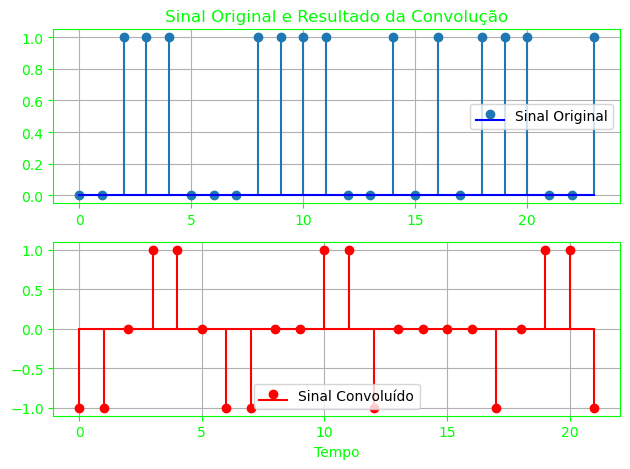


Perceba como o resultado da convolução tem picos onde o sinal muda bruscamente (de 0 para 1 ou de 1 para 0). O filtro detectou as 'bordas' do nosso sinal!


In [6]:
from IPython.display import clear_output

# Dados de entrada
sinal = np.array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])
kernel = np.array([1, 0, -1]) # Um filtro simples para detectar mudanças (bordas)

print("Sinal de Entrada:", sinal)
print("Filtro (Kernel):", kernel)
print("-" * 50)

# A convolução "válida" tem tamanho len(sinal) - len(kernel) + 1
resultado = np.zeros(len(sinal) - len(kernel) + 1)

print("Iniciando a visualização do processo de convolução 1D...\n")
time.sleep(2)

# Visualização passo a passo
for i in range(len(resultado)):
    clear_output(wait=True)
    print("Sinal de Entrada:", sinal)
    print("Filtro (Kernel):", kernel)
    print("-" * 50)
    print(f"Passo {i+1}:")

    # Mostra o alinhamento
    padding = " " * (i * 2)
    print("Sinal:", sinal)
    print("Filtro:", padding, kernel)

    # Pega a fatia do sinal
    fatia_sinal = sinal[i:i+len(kernel)]

    # Operação de convolução
    calculo = fatia_sinal * kernel
    soma = np.sum(calculo)
    resultado[i] = soma

    print(f"Fatia do Sinal...: {fatia_sinal}")
    print(f"Multiplicação....: {calculo}")
    print(f"Soma.............: {soma}")
    print("\nResultado Parcial:", resultado)
    time.sleep(1.5)

clear_output(wait=True)
print("Sinal de Entrada:", sinal)
print("Filtro (Kernel):", kernel)
print("-" * 50)
print("Processo Finalizado!")
print("Resultado Final da Convolução:", resultado)

# Resultado usando a função pronta do NumPy para comparação
resultado_numpy = np.convolve(sinal, kernel, mode='valid')
print("Resultado usando np.convolve:", resultado_numpy)

# Plotando os resultados
fig, ax = plt.subplots(2, 1) # , figsize=(12, 6))
ax[0].stem(sinal, basefmt="b-", label='Sinal Original')
ax[0].set_title('Sinal Original e Resultado da Convolução')
ax[0].legend()
ax[0].grid(True)

ax[1].stem(resultado, linefmt='r-', markerfmt='ro', basefmt="r-", label='Sinal Convoluído')
ax[1].set_xlabel('Tempo')
ax[1].legend()
ax[1].grid(True)

figureFormat(ax, fig, tight=True)
plt.show()

print("\nPerceba como o resultado da convolução tem picos onde o sinal muda bruscamente (de 0 para 1 ou de 1 para 0). O filtro detectou as 'bordas' do nosso sinal!")


Áudio original:


/tmp/ipykernel_33214/3000530186.py:19: WavFileWarning: Chunk (non-data) not understood, skipping it.
  taxa_amostragem, audio_data = wavfile.read(nome_arquivo_audio)


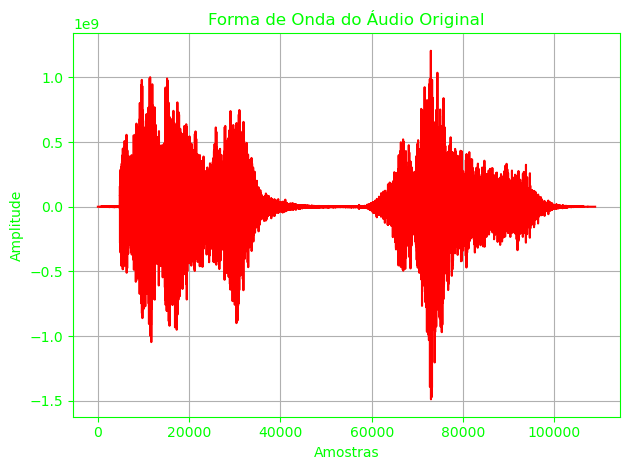

interactive(children=(Dropdown(description='nome_do_filtro', options=('Eco', 'Passa-Baixa (Abafado)', 'Passa-A…

In [8]:
from scipy.io import wavfile
from IPython.display import Audio
import requests

# --- Baixar um arquivo de áudio de exemplo (.wav) ---
# Usaremos um som simples para o efeito ser mais claro
url_audio1 = "https://www.soundjay.com/door/door-1-close.wav"
url_audio2 = "https://www.soundjay.com/human/man-scream-02.wav"
url_audio3 = 'https://www.soundjay.com/human/baby-laughing-01.wav'
nome_arquivo_audio = "audio_exemplo.wav"

try:
    r = requests.get(url_audio3)
    with open(nome_arquivo_audio, 'wb') as f:
        f.write(r.content)

    # --- Carregar o áudio ---
    # wavfile.read retorna a taxa de amostragem (amostras por segundo) e os dados do áudio
    taxa_amostragem, audio_data = wavfile.read(nome_arquivo_audio)

    # Normalizar o áudio para o intervalo [-1, 1] para facilitar o processamento
    # Verificamos o tipo de dado para fazer a normalização correta
    if audio_data.dtype == np.int16:
        audio_data = audio_data.astype(np.float32) / 32767.0
    elif audio_data.dtype == np.uint8:
        audio_data = (audio_data.astype(np.float32) - 128) / 128.0

    # Se for estéreo, pegamos apenas um canal
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]


    print("Áudio original:")
    display(Audio(audio_data, rate=taxa_amostragem))

    # Plotar a forma de onda (waveform)
    fig, ax = plt.subplots() # , figsize=(15, 4))
    ax.plot(audio_data, 'r')
    ax.set_title("Forma de Onda do Áudio Original")
    ax.set_xlabel("Amostras")
    ax.set_ylabel("Amplitude")
    ax.grid(True)

    figureFormat(ax, fig, tight=True)
    plt.show()

    # --- Criando filtros de áudio ---

    # 1. Filtro de Eco Simples
    # Um impulso no início (o som original) e outro menor depois (o eco)
    eco_delay_segundos = 0.2
    eco_delay_amostras = int(eco_delay_segundos * taxa_amostragem)
    filtro_eco = np.zeros(eco_delay_amostras + 1)
    filtro_eco[0] = 1.0     # Som original
    filtro_eco[eco_delay_amostras] = 0.6 # Eco com 60% da amplitude

    # 2. Filtro Passa-Baixa (Low-pass) -> Efeito "abafado"
    # É uma média móvel, similar ao blur de imagem. Remove altas frequências.
    tamanho_filtro_pb = 15
    filtro_passa_baixa = np.ones(tamanho_filtro_pb) / tamanho_filtro_pb

    # 3. Filtro Passa-Alta (High-pass) -> Efeito "metálico/fino"
    # Realça as diferenças rápidas, removendo as baixas frequências.
    filtro_passa_alta = np.array([-1, 2, -1])


    filtros_audio = {
        "Eco": filtro_eco,
        "Passa-Baixa (Abafado)": filtro_passa_baixa,
        "Passa-Alta (Metálico)": filtro_passa_alta
    }

    # --- Função Interativa ---
    @interact(nome_do_filtro=list(filtros_audio.keys()))
    def aplicar_filtro_no_audio(nome_do_filtro):
        kernel = filtros_audio[nome_do_filtro]

        # Aplicar convolução
        audio_convoluido = np.convolve(audio_data, kernel, mode='same')

        # Normalizar o resultado para evitar clipping (distorção)
        max_val = np.max(np.abs(audio_convoluido))
        if max_val > 0:
            audio_convoluido = audio_convoluido / max_val

        print(f"\nResultado do filtro '{nome_do_filtro}':")
        display(Audio(audio_convoluido, rate=taxa_amostragem))

        # Plotar o resultado
        fig, ax = plt.subplots() # , figsize=(15, 4))
        ax.plot(audio_convoluido, 'r')
        ax.set_title(f"Forma de Onda com Filtro '{nome_do_filtro}'")
        ax.set_xlabel("Amostras")
        ax.set_ylabel("Amplitude")
        ax.grid(True)

        figureFormat(ax, fig, tight=True)
        plt.show()

except Exception as e:
    print(f"Não foi possível carregar o áudio. Erro: {e}")


### 3.1 Convolução 2D: O Experimento na Matriz
Agora, vamos para duas dimensões. Usaremos uma matriz 10x10 com valores de 0 a 255 (como uma imagem em escala de cinza) e aplicaremos diferentes filtros para ver o que acontece.

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzRoeDBqMmwwMWc0amE4Z2V5bGp3YnFsbWUyMm1peG51b3Z5cnFuNCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/i4NjAwytgIRDW/giphy.gif">



Matriz de Entrada (Pense nela como uma imagem 10x10 pixels):


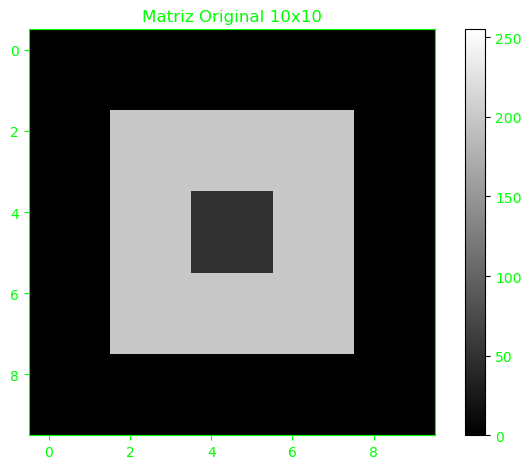

interactive(children=(Dropdown(description='nome_do_filtro', options=('Identidade', 'Detector de Bordas Vertic…

<function __main__.aplicar_e_mostrar_filtro(nome_do_filtro)>

In [19]:
from scipy.signal import convolve2d

# Criar uma matriz 10x10 interessante para o experimento
# Vamos criar uma espécie de "quadrado" no meio
matriz_base = np.zeros((10, 10), dtype=np.uint8)
matriz_base[2:8, 2:8] = 200 # Um quadrado claro no centro
matriz_base[4:6, 4:6] = 50 # Um quadrado escuro dentro do claro

print("Matriz de Entrada (Pense nela como uma imagem 10x10 pixels):")
fig, ax = plt.subplots()
ax.set_title("Matriz Original 10x10")
im = ax.imshow(matriz_base, cmap='gray', vmin=0, vmax=255)
cbar = fig.colorbar(im, ax=ax)
cb_ytick = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cb_ytick, color='lime')

figureFormat(ax, fig, tight=True)
plt.show()

# --- Definindo os Filtros (Kernels) ---
# Cada filtro é uma pequena matriz que extrai uma informação diferente

# 1. Filtro de Identidade: Não faz nada, o resultado é a própria imagem.
filtro_identidade = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

# 2. Filtro de Detecção de Bordas Verticais (Sobel)
filtro_sobel_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# 3. Filtro de Detecção de Bordas Horizontais (Sobel)
filtro_sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# 4. Filtro de "Sharpen" (Aguçar/Realçar detalhes)
filtro_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# 5. Filtro de "Box Blur" (Borrão/Suavização)
# A soma dos elementos deve ser 1 para não alterar o brilho.
filtro_blur = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

#6. Filtro Gaussiano
filtro_gaussiano = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Dicionário de filtros para o dropdown
filtros_disponiveis = {
    "Identidade": filtro_identidade,
    "Detector de Bordas Verticais": filtro_sobel_vertical,
    "Detector de Bordas Horizontais": filtro_sobel_horizontal,
    "Realçar Detalhes (Sharpen)": filtro_sharpen,
    "Suavização (Blur)": filtro_blur,
    "Gaussiano": filtro_gaussiano
}

# Função que será chamada pelo widget interativo
def aplicar_e_mostrar_filtro(nome_do_filtro):
    filtro_selecionado = filtros_disponiveis[nome_do_filtro]

    # Aplicar a convolução 2D
    # O modo 'same' garante que a saída tenha o mesmo tamanho da entrada
    matriz_convoluida = convolve2d(matriz_base, filtro_selecionado, mode='same', boundary='fill', fillvalue=0)

    # Plotar os resultados lado a lado
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Matriz Original
    im1 = ax[0].imshow(matriz_base, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title("Matriz Original")
    cbar = fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    cb_ytick = plt.getp(cbar.ax.axes, 'yticklabels')
    plt.setp(cb_ytick, color='lime')

    # Filtro
    im2 = ax[1].imshow(filtro_selecionado, cmap='coolwarm')
    ax[1].set_title(f"Filtro: {nome_do_filtro}")
    for (j, i), label in np.ndenumerate(filtro_selecionado):
        ax[1].text(i, j, f'{label:.1f}', ha='center', va='center', color='white', fontsize=12)

    # Matriz Resultante
    im3 = ax[2].imshow(matriz_convoluida, cmap='gray')
    ax[2].set_title("Matriz Resultante da Convolução")
    cbar = fig.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)
    cb_ytick = plt.getp(cbar.ax.axes, 'yticklabels')
    plt.setp(cb_ytick, color='lime')

    figureFormat(ax, fig, tight=True)
    plt.show()

    print("\n--- O que aconteceu? ---")
    if nome_do_filtro == "Identidade":
        print("O filtro identidade, com um '1' no centro, simplesmente copia o valor do pixel original. O resultado é idêntico à entrada.")
    elif "Bordas Verticais" in nome_do_filtro:
        print("Este filtro possui valores negativos à esquerda e positivos à direita. O resultado é alto (branco) onde há uma transição de escuro para claro na vertical, e baixo (preto) onde a transição é de claro para escuro.")
    elif "Bordas Horizontais" in nome_do_filtro:
        print("Similar ao anterior, mas na horizontal. Ele realça as bordas de cima e de baixo do nosso quadrado.")
    elif "Realçar Detalhes" in nome_do_filtro:
        print("Este filtro subtrai os valores dos vizinhos do valor central (que é multiplicado por 5). Isso aumenta a diferença entre um pixel e seus vizinhos, tornando a imagem mais 'nítida'.")
    elif "Suavização" in nome_do_filtro:
        print("Este filtro calcula a média dos valores dos pixels vizinhos. Isso suaviza as transições bruscas, criando um efeito de 'borrão' (blur).")

# Criar o widget interativo
interact(aplicar_e_mostrar_filtro, nome_do_filtro=list(filtros_disponiveis.keys()))


### 3.2 Aplicação Prática: Convolução em Imagens
Agora vamos sair da matriz 10x10 e aplicar os mesmos filtros em uma imagem de verdade. Para simplificar, vamos convertê-la para escala de cinza primeiro.


In [20]:
import cv2
from PIL import Image
from io import BytesIO

# URL de uma imagem de exemplo (pode ser trocada)
url_imagem1 = "https://wallpapers.com/images/hd/animal-planet-blue-and-yellow-macaw-4ukd4g7gkurs6bri.jpg"
url_imagem2 = "https://wallpapers.com/images/hd/batman-on-top-of-building-4k-jme93pv3smv5izsy.jpg"
url_imagem3 = "https://artesanatonarede.com.br/wp-content/uploads/2020/11/pontilhismo-2-640x490-1.jpg"

try:
    # Baixar a imagem
    response = requests.get(url_imagem1)
    img_pil = Image.open(BytesIO(response.content))

    # Converter para um array numpy e para escala de cinza
    img_original_color = np.array(img_pil)
    img_original_gray = cv2.cvtColor(img_original_color, cv2.COLOR_RGB2GRAY)

    print("Imagem carregada com sucesso!")

    # Função para aplicar o filtro e mostrar (reutilizando a lógica anterior)
    def aplicar_filtro_na_imagem(nome_do_filtro):
        filtro_selecionado = filtros_disponiveis[nome_do_filtro]

        # Usamos a função do OpenCV que é otimizada para imagens
        imagem_filtrada = cv2.filter2D(src=img_original_gray, ddepth=-1, kernel=filtro_selecionado)

        # Plotar
        fig, ax = plt.subplots(1, 2, figsize=(15, 8))
        ax[0].imshow(img_original_gray, cmap='gray')
        ax[0].set_title("Imagem Original (Escala de Cinza)")
        ax[0].axis('off')

        ax[1].imshow(imagem_filtrada, cmap='gray')
        ax[1].set_title(f"Resultado com Filtro '{nome_do_filtro}'")
        ax[1].axis('off')

        figureFormat(ax, fig, tight=True)
        plt.show()

    # Widget interativo para imagens
    interact(aplicar_filtro_na_imagem, nome_do_filtro=list(filtros_disponiveis.keys()));


except Exception as e:
    print(f"Não foi possível carregar a imagem da URL. Erro: {e}")
    print("Por favor, verifique a URL ou sua conexão com a internet.")


Imagem carregada com sucesso!


interactive(children=(Dropdown(description='nome_do_filtro', options=('Identidade', 'Detector de Bordas Vertic…

## 4. Conclusão
Hoje vimos que a **Convolução** é muito mais que uma equação complexa. É uma ferramenta poderosa e versátil para **extração de características**.

- **O Conceito Central:** Uma operação de "janela deslizante" onde um **filtro (kernel)** é aplicado sobre os dados.
- **Em 1D (Vetores/Séries Temporais/Áudio):** Vimos como a convolução pode detectar mudanças em um sinal ou criar efeitos como eco e filtros de frequência.
- **Em 2D (Matrizes/Imagens):** Vimos como diferentes filtros podem detectar bordas, suavizar (blur) ou realçar detalhes (sharpen) em uma imagem.

O que você viu aqui é a base para muitas técnicas avançadas:

-   **Visão Computacional:** As Redes Neurais Convolucionais (CNNs) usam esse princípio para aprender automaticamente os melhores filtros para reconhecer objetos, faces e cenas em imagens.
-   **Processamento de Áudio:** Equalizadores, removedores de ruído e sintetizadores de voz usam convoluções extensivamente.
-   **Análise de Sinais:** Em campos como medicina (ECG, EEG) e geofísica, a convolução é usada para filtrar ruídos e identificar padrões.

Esperamos que esta apresentação tenha tornado o conceito de convolução mais claro e prático!
